In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

## Data Preperation

In [2]:
pwd # In order to see current directory of jupyter notebook

'C:\\Users\\Muiz Alvi'

In [3]:
# Organize data into train, valid, test dirs

os.chdir('dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')
    
os.chdir('../../')

In [4]:
train_path = 'Muiz Alvi/dogs-vs-cats/train/'
valid_path = 'Muiz Alvi/dogs-vs-cats/valid/'
test_path = 'Muiz Alvi/dogs-vs-cats/test/'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (244, 244), classes = ['cat', 'dog'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = valid_path, target_size = (244, 244), classes = ['cat', 'dog'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (244, 244), classes = ['cat', 'dog'], batch_size = 10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [7]:
imgs, labels = next(train_batches)

In [8]:
# function to plot images in a 1 by 10 grid taken directly from Tensor Flow's website. url: https://www.tensorflow.org/tutorials/images/classification#visualize_training_images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

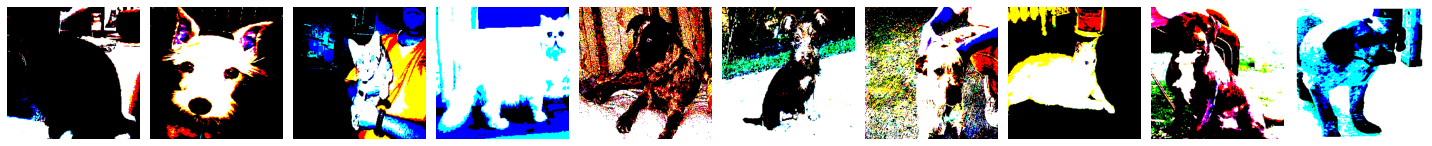

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs) 
print(labels) # [0. 1.] for dog, [1. 0.] for cat

## Build and Train CNN

In [10]:
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (244,244,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        Flatten(),
        Dense(units = 2, activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 244, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 952576)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1905154   
Total params: 1,924,546
Trainable params: 1,924,546
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(x = train_batches, validation_data = valid_batches, epochs = 10, verbose = 2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 95s - loss: 49.3846 - accuracy: 0.5860 - val_loss: 8.5517 - val_accuracy: 0.5600
Epoch 2/10
100/100 - 84s - loss: 7.1045 - accuracy: 0.7430 - val_loss: 7.5191 - val_accuracy: 0.6100
Epoch 3/10
100/100 - 94s - loss: 1.4016 - accuracy: 0.8880 - val_loss: 6.3726 - val_accuracy: 0.5900
Epoch 4/10
100/100 - 75s - loss: 0.3324 - accuracy: 0.9620 - val_loss: 6.1851 - val_accuracy: 0.6050
Epoch 5/10
100/100 - 64s - loss: 0.0499 - accuracy: 0.9920 - val_loss: 5.1478 - val_accuracy: 0.6350
Epoch 6/10
100/100 - 64s - loss: 0.0117 - accuracy: 0.9960 - val_loss: 5.6572 - val_accuracy: 0.6150
Epoch 7/10
100/100 - 64s - loss: 6.9555e-04 - accuracy: 1.0000 - val_loss: 6.0171 - val_accuracy: 0.6000
Epoch 8/10
100/100 - 64s - loss: 2.0719e-04 - accuracy: 1.0000 - val_loss: 5.4726 - val_accuracy: 0.6050
Epoch 9/10
100/100 - 64s - loss: 2.6756e-05 - accuracy: 1.0000 - val_loss: 5.2207 - val_ac